In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# ✅ Load dataset (resize smaller for speed)
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Dataset/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [4]:
#Validate ImageProcessing
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Dataset/valid",
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [5]:
# ✅ Save class names BEFORE prefetch/cache
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

In [6]:
# ✅ Optimize pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
# ✅ Use Transfer Learning (fast + accurate)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # freeze backbone

C:\Users\gauta\AppData\Local\Temp\ipykernel_14064\517809657.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [8]:
# ✅ Build Model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")  # ✅ Now works
])

C:\Users\gauta\AppData\Local\Temp\ipykernel_14064\883782068.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [9]:
# ✅ Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
# ✅ Early stopping (save time)
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [11]:
# ✅ Train
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stop]
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 641s 199ms/step - accuracy: 0.2007 - loss: 3.0252 - val_accuracy: 0.3994 - val_loss: 2.1794
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 249s 113ms/step - accuracy: 0.3522 - loss: 2.2841 - val_accuracy: 0.4667 - val_loss: 1.9183
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 247s 113ms/step - accuracy: 0.4132 - loss: 2.0468 - val_accuracy: 0.4941 - val_loss: 1.7985
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 194s 88ms/step - accuracy: 0.4467 - loss: 1.9264 - val_accuracy: 0.5148 - val_loss: 1.7219
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 87ms/step - accuracy: 0.4654 - loss: 1.8464 - val_accuracy: 0.5229 - val_loss: 1.6717
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 86ms/step - accuracy: 0.4806 - loss: 1.7901 - val_accuracy: 0.5332 - val_loss: 1.6341
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.4918 - loss: 1.7513 - val_accuracy: 0.5421 - val_loss: 1.6026
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 183s 83ms/step - accurac

In [12]:
# ✅ Evaluate
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.2f}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - accuracy: 0.5571 - loss: 1.5439
Validation Accuracy: 0.56


In [13]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
for x,y in train_ds:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[146.25 140.25 142.25]
   [142.5  136.5  138.5 ]
   [147.5  141.5  143.5 ]
   ...
   [127.25 119.25 116.25]
   [140.5  132.5  129.5 ]
   [142.   134.   131.  ]]

  [[149.25 143.25 145.25]
   [138.5  132.5  134.5 ]
   [131.75 125.75 127.75]
   ...
   [137.5  129.5  126.5 ]
   [129.5  121.5  118.5 ]
   [138.5  130.5  127.5 ]]

  [[140.   134.   136.  ]
   [132.25 126.25 128.25]
   [152.25 146.25 148.25]
   ...
   [151.   143.   140.  ]
   [146.   138.   135.  ]
   [146.5  138.5  135.5 ]]

  ...

  [[155.5  151.5  152.5 ]
   [154.5  150.5  151.5 ]
   [165.   161.   162.  ]
   ...
   [166.   162.   163.  ]
   [172.   168.   169.  ]
   [164.75 160.75 161.75]]

  [[157.   153.   154.  ]
   [154.5  150.5  151.5 ]
   [169.25 165.25 166.25]
   ...
   [169.25 165.25 166.25]
   [183.25 179.25 180.25]
   [177.75 173.75 174.75]]

  [[161.   157.   158.  ]
   [151.5  147.5  148.5 ]
   [162.5  158.5  159.5 ]
   ...
   [175.5  171.5  172.5 ]
   [182.   178.   179.  ]
   [173.   169.   17

In [15]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(train_ds)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.5774 - loss: 1.4810


In [16]:
print(train_loss,train_acc)

1.4809589385986328 0.5773810148239136


In [17]:
#Model on Validation set
val_loss,val_acc = model.evaluate(val_ds)

550/550 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.5571 - loss: 1.5439


In [18]:
print(val_loss, val_acc)

1.5439317226409912 0.5570794343948364


In [19]:
### Saving Model

In [20]:
model.save("trained_model.keras")

In [21]:
history.history

{'accuracy': [0.20069706439971924,
  0.35221564769744873,
  0.41322997212409973,
  0.446703165769577,
  0.4653673768043518,
  0.4805604815483093,
  0.4918273091316223,
  0.5011593699455261,
  0.5074045062065125,
  0.509666383266449],
 'loss': [3.025197744369507,
  2.2841122150421143,
  2.0467662811279297,
  1.9263930320739746,
  1.8464200496673584,
  1.7900665998458862,
  1.7512786388397217,
  1.718026876449585,
  1.6973536014556885,
  1.6777138710021973],
 'val_accuracy': [0.39944228529930115,
  0.46670839190483093,
  0.4941383898258209,
  0.514796257019043,
  0.5228772759437561,
  0.533234715461731,
  0.5421124696731567,
  0.545754611492157,
  0.5533234477043152,
  0.5570794343948364],
 'val_loss': [2.179377317428589,
  1.918320894241333,
  1.7985190153121948,
  1.7219020128250122,
  1.671662449836731,
  1.6341444253921509,
  1.6025686264038086,
  1.5820108652114868,
  1.5637575387954712,
  1.5439317226409912]}

In [22]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(history.history,f)

In [23]:
history.history['val_accuracy']

[0.39944228529930115,
 0.46670839190483093,
 0.4941383898258209,
 0.514796257019043,
 0.5228772759437561,
 0.533234715461731,
 0.5421124696731567,
 0.545754611492157,
 0.5533234477043152,
 0.5570794343948364]

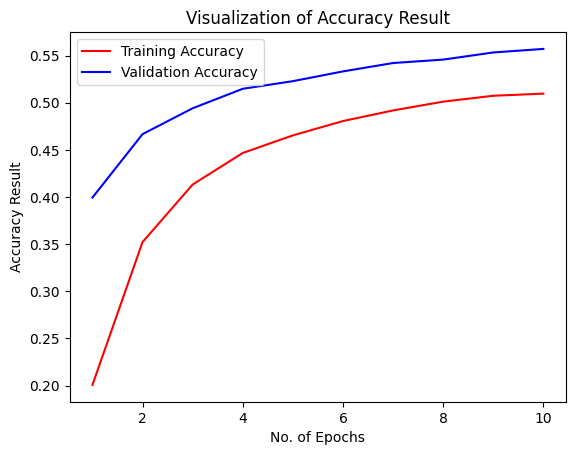

In [24]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [25]:
#Some Others Metrics for Model Evaluation
y_pred = model.predict(val_ds)
print("Class Names:", class_names)

550/550 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 141s 255ms/step


(array([[7.9099403e-04, 1.0262540e-05, 7.6887186e-04, ..., 1.1520078e-05,
         1.6534666e-06, 4.1052626e-05],
        [5.8135379e-04, 9.0416279e-06, 4.1602339e-04, ..., 1.9541580e-05,
         6.6852044e-07, 4.9933232e-04],
        [3.9140696e-06, 4.3815603e-06, 2.1048125e-05, ..., 3.9417268e-11,
         3.2345160e-09, 2.0969841e-07],
        ...,
        [1.0998334e-03, 5.9015707e-05, 5.3525693e-04, ..., 1.7538735e-04,
         2.4833405e-05, 4.8692257e-04],
        [4.3958062e-04, 3.1860454e-06, 7.4981764e-04, ..., 2.7118824e-04,
         3.4103491e-06, 1.0353648e-03],
        [1.0146607e-04, 1.6258965e-04, 2.9643442e-04, ..., 5.2311079e-06,
         1.4707871e-03, 2.2693879e-03]], dtype=float32),
 (17572, 38))

In [28]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [29]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([8, 8, 8, ..., 8, 8, 8])>

In [30]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [31]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
# ✅ True labels
Y_true = np.concatenate([y for x, y in val_ds], axis=0)
Y_true = np.argmax(Y_true, axis=1)

# ✅ Predictions
y_pred = model.predict(val_ds)
predicted_categories = np.argmax(y_pred, axis=1)

# ✅ Use correct variable: class_names
print("Class Names:", class_names)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [33]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[178,  33,   9, ...,   4,   3,  28],
       [ 18, 252,   2, ...,   0,   5,  11],
       [  4,   1, 266, ...,  12,   4,   0],
       ...,
       [  3,   3,   3, ..., 169,  12,   3],
       [ 13,   7,   7, ...,   3, 289,   1],
       [ 27,   5,   2, ...,   0,   9, 281]])

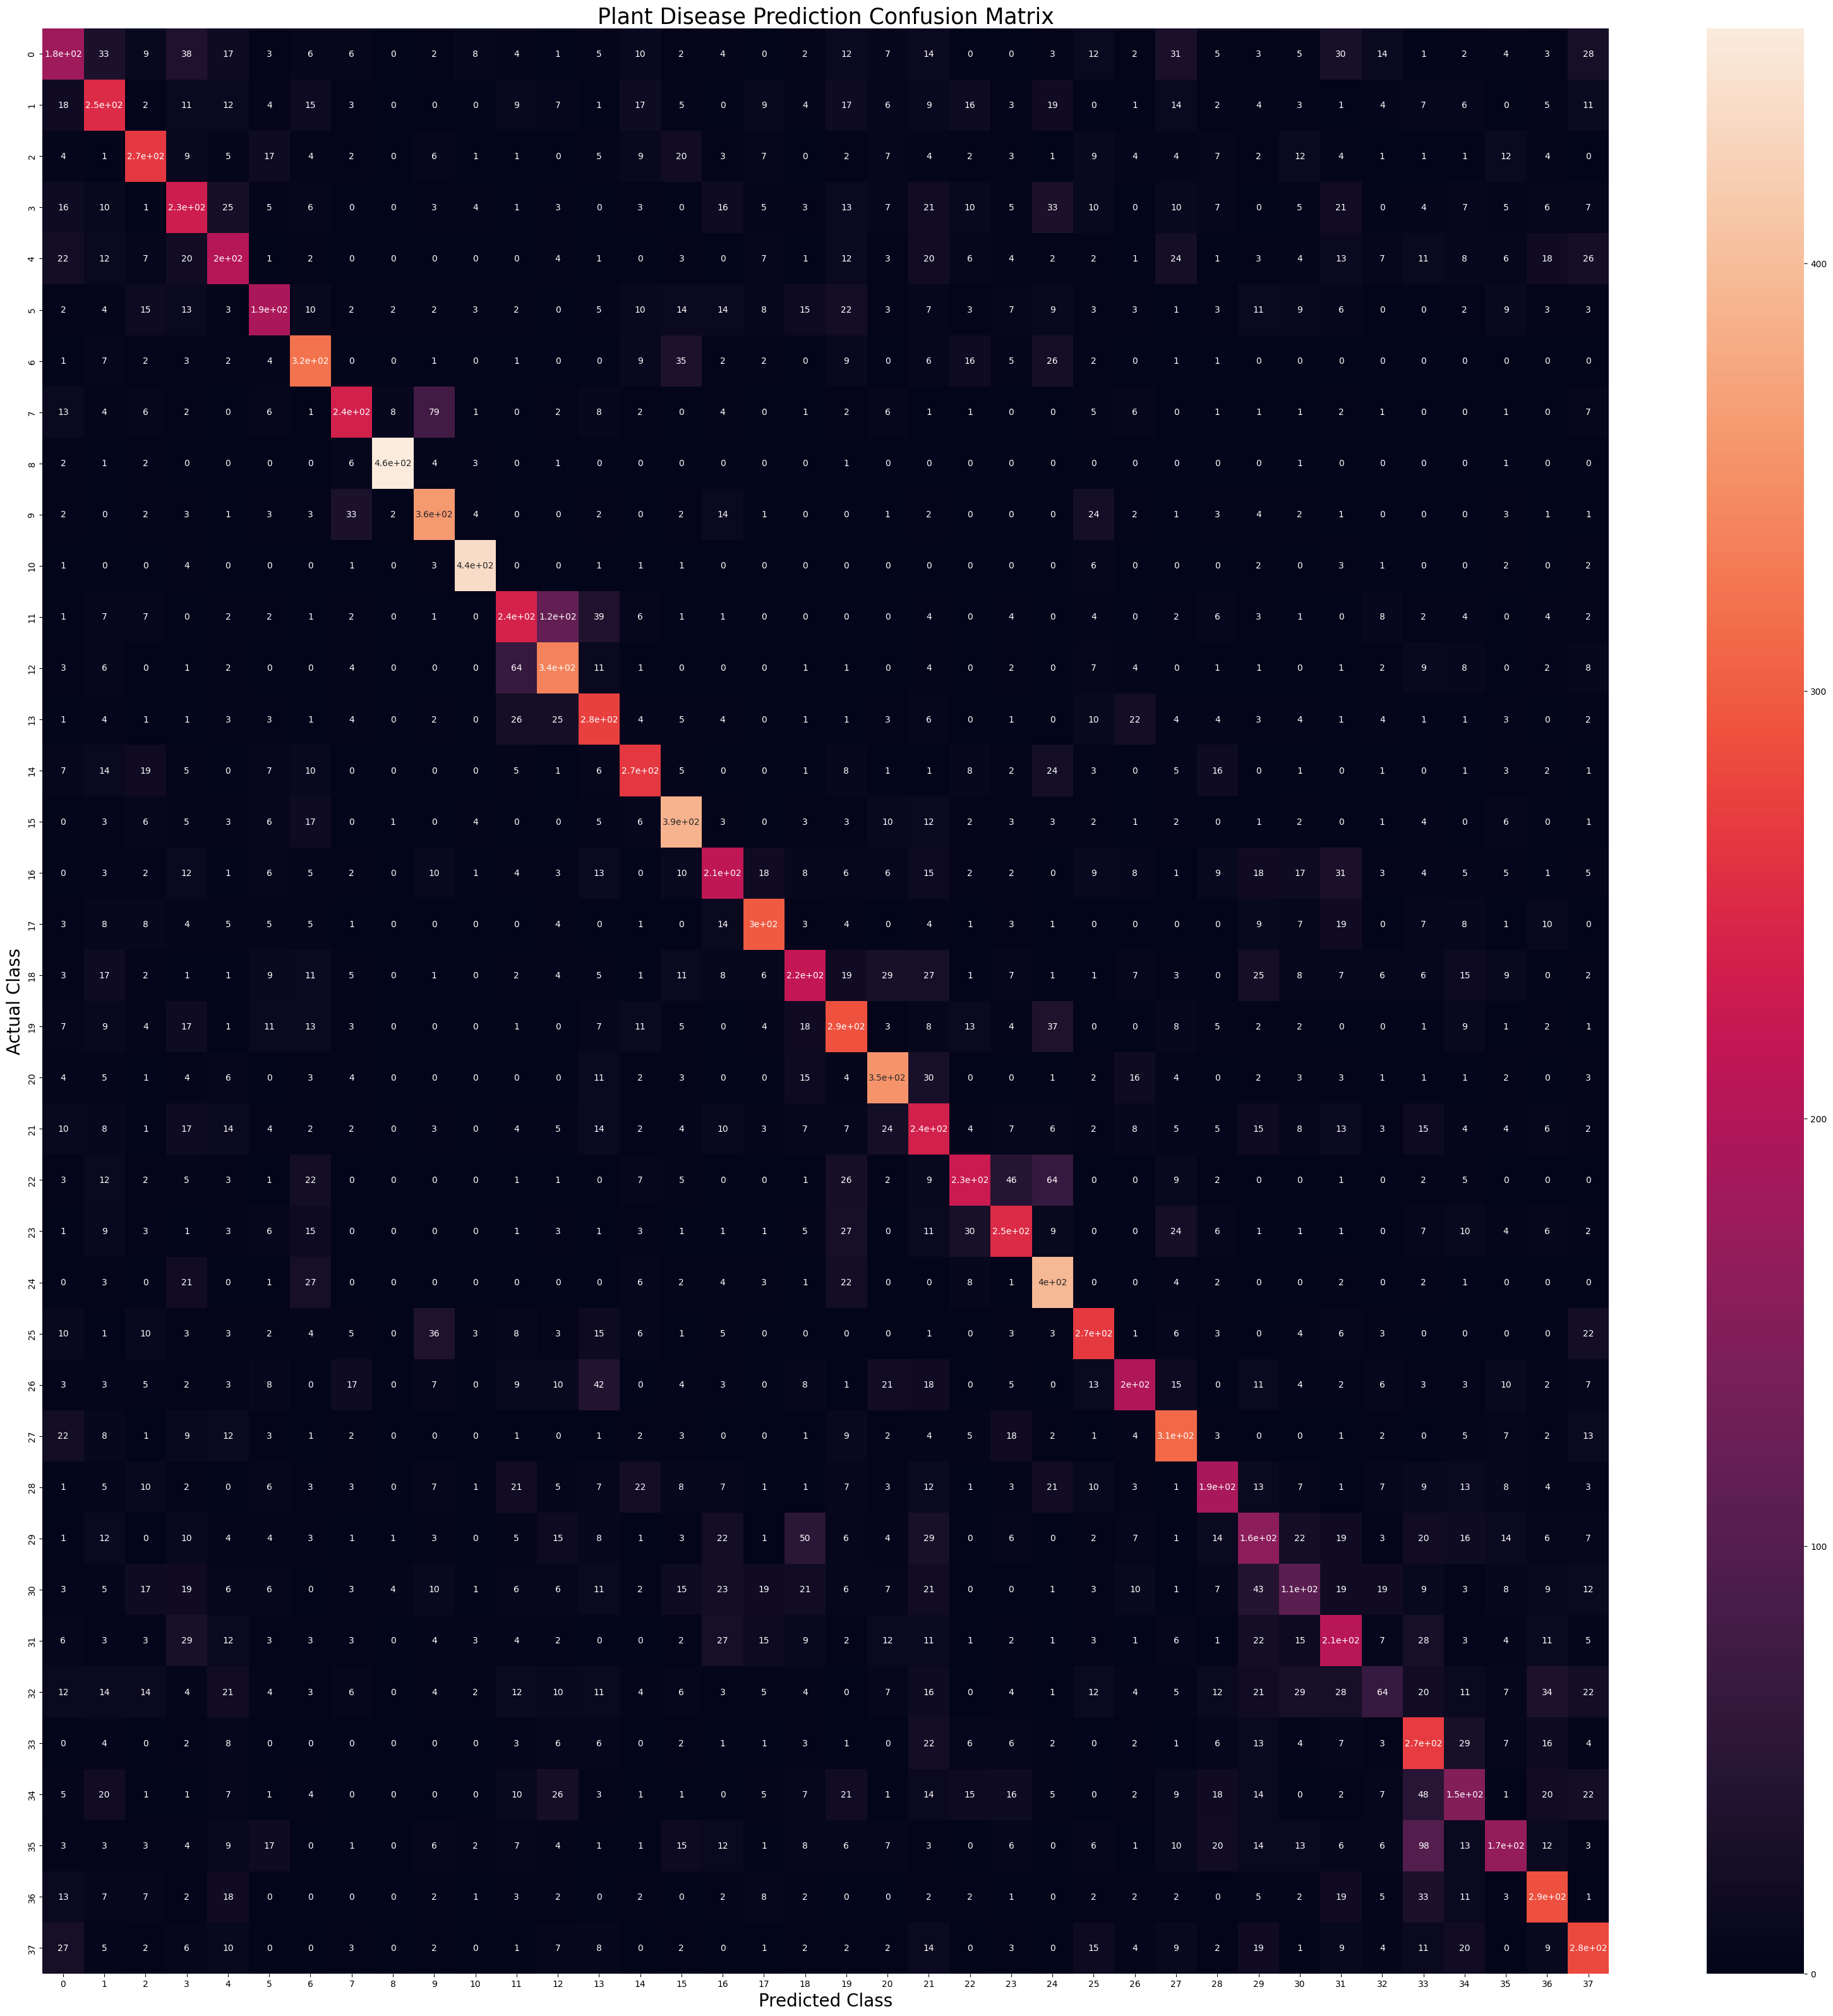

In [34]:
#Confussion Matrix Visualization
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

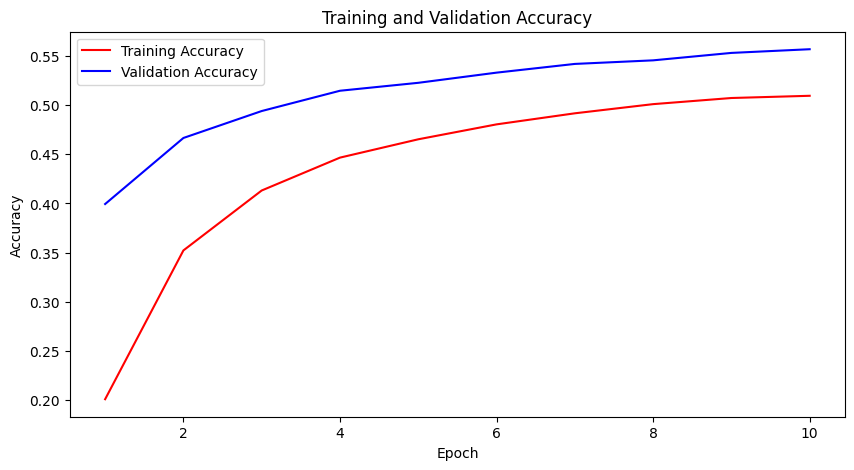

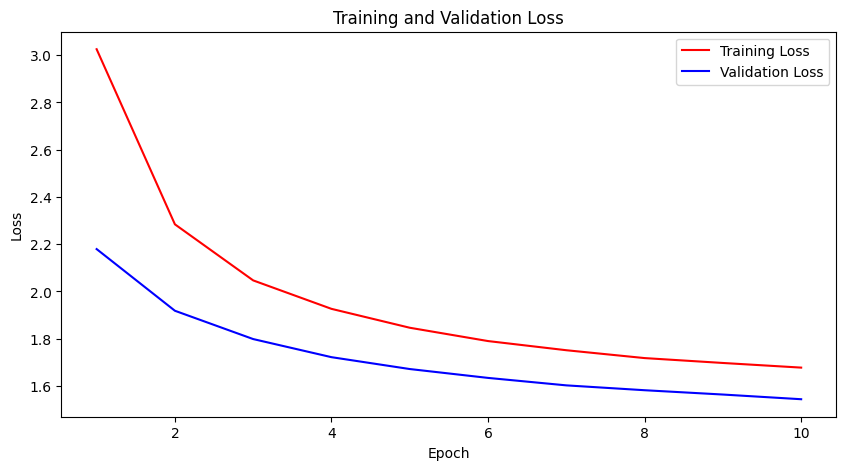

In [35]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


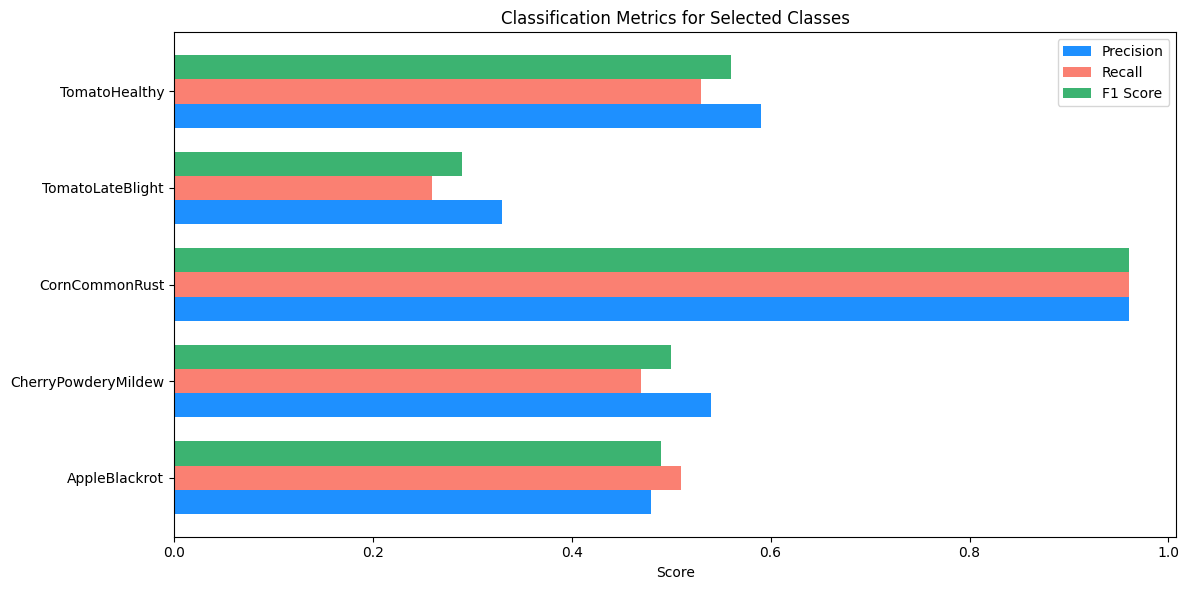

In [36]:
# After evaluation, using classification_report output with sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Replace these with your actual lists from the report or select classes you want to plot
classes = ["AppleBlackrot", "CherryPowderyMildew", "CornCommonRust", "TomatoLateBlight", "TomatoHealthy"]
precision = [0.48, 0.54, 0.96, 0.33, 0.59]
recall = [0.51, 0.47, 0.96, 0.26, 0.53]
f1_score = [0.49, 0.50, 0.96, 0.29, 0.56]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(12,6))
plt.barh(x - width, precision, height=width, label='Precision', color='dodgerblue')
plt.barh(x, recall, height=width, label='Recall', color='salmon')
plt.barh(x + width, f1_score, height=width, label='F1 Score', color='mediumseagreen')
plt.yticks(x, classes)
plt.xlabel("Score")
plt.title("Classification Metrics for Selected Classes")
plt.legend()
plt.tight_layout()
plt.show()


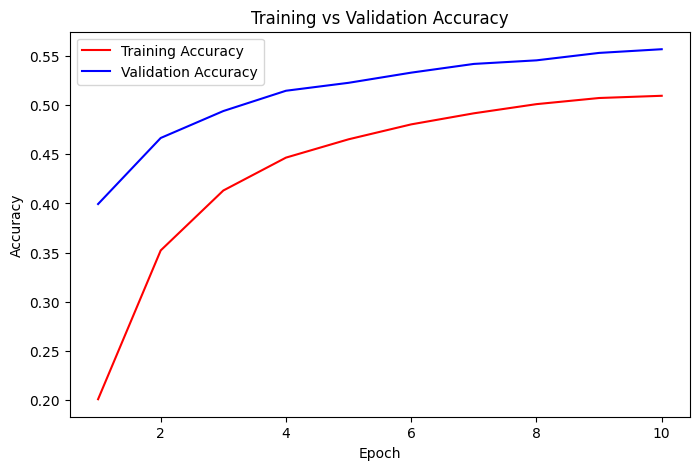

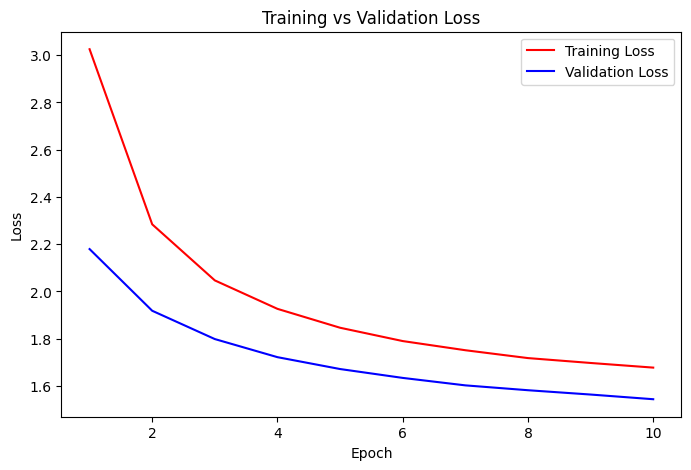

In [39]:
import matplotlib.pyplot as plt

# epochs: integer list for x-axis
# history: Keras History object from model.fit
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, history.history['accuracy'], 'r-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


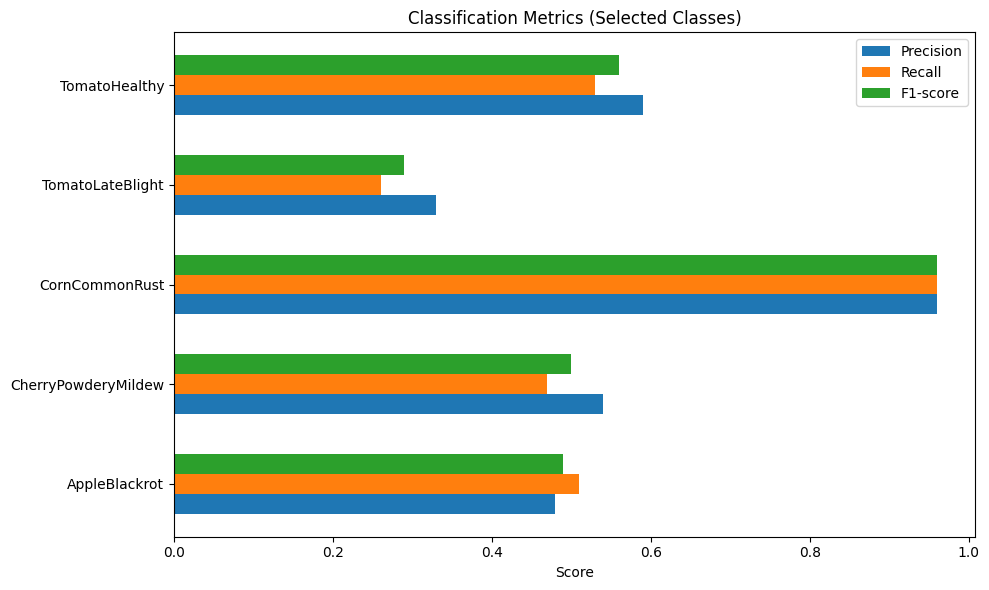

In [40]:
import numpy as np
import matplotlib.pyplot as plt

classes = ["AppleBlackrot", "CherryPowderyMildew", "CornCommonRust", "TomatoLateBlight", "TomatoHealthy"]
precision = [0.48,0.54,0.96,0.33,0.59]
recall = [0.51,0.47,0.96,0.26,0.53]
f1_score = [0.49,0.50,0.96,0.29,0.56]

x = np.arange(len(classes))
bar_width = 0.2

plt.figure(figsize=(10,6))
plt.barh(x-bar_width, precision, height=bar_width, label='Precision')
plt.barh(x, recall, height=bar_width, label='Recall')
plt.barh(x+bar_width, f1_score, height=bar_width, label='F1-score')
plt.yticks(x, classes)
plt.xlabel('Score')
plt.title('Classification Metrics (Selected Classes)')
plt.legend()
plt.tight_layout()
plt.show()
